In [3]:
import pandas as pd
import geopandas as gpd
import osmnx as ox
import folium
import matplotlib.pyplot as plt
import seaborn as sns

In [144]:
place = 'Linz, Austria'
amenities = ['bar', 'restaurant', 'biergarten', 'pub', 'cafe']
bars = ox.geometries_from_place(place, {'amenity': amenities})
bars.tail()

,unique_id,osmid,element_type,addr:city,addr:country,addr:housenumber,addr:postcode,addr:street,amenity,contact:phone,...,disused,dance:style,historic,ship:type,construction,surface,indoor,floating,ways,type
517,way/385865858,385865858,way,NaN,NaN,NaN,NaN,NaN,cafe,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN
518,way/385865871,385865871,way,NaN,NaN,NaN,NaN,NaN,cafe,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN
519,way/385869092,385869092,way,Linz,AT,3-6,4020,Bahnhofplatz,cafe,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN
520,way/388777894,388777894,way,NaN,NaN,NaN,NaN,NaN,bar,+43 732 24686928,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN
521,relation/374768,374768,relation,Linz,AT,91,4030,Florianer Straße,biergarten,+43 732 307104,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[47374689, 47374079]",multipolygon


<AxesSubplot:>

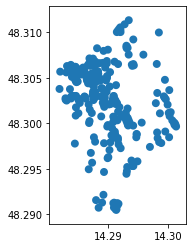

In [145]:
linz_districts = gpd.read_file('linz/StatBez_Linz_EPSG_4326.gml')
inner_city = linz_districts[linz_districts['Stb'] == 1]

inner_shape = inner_city['geometry'][0]
inner_shape

# how many restaurants are within the inner city
central_bars = bars[bars.within(inner_shape)]
transformed = central_bars.to_crs('EPSG:32618')
central_bar_areas = transformed.buffer(65).to_crs('EPSG:4326')
central_bar_areas.plot()

In [146]:
bounds = inner_shape.bounds
area = central_bar_areas.unary_union

m = folium.Map(tiles="Stamen Toner")

m.fit_bounds([[bounds[1], bounds[0]], [bounds[3], bounds[2]]])
style_bar = lambda x: {'fillColor': 'red', 'stroke': False, 'fillOpacity': .4}
style_city = lambda x: {'color': 'red', 'fillOpacity': .05, 'opacity': 68}

folium.GeoJson(gpd.GeoSeries([inner_shape]).to_json(),
                style_function = style_city).add_to(m)

folium.GeoJson(gpd.GeoSeries([area]).to_json(),
                style_function = style_bar).add_to(m)
m.save('center.html')

percent = 100.0 * area.area / inner_shape.area
print(percent)

m

32.81158785957038


In [147]:

transformed = bars.to_crs('EPSG:32618')
bar_areas = transformed.buffer(75).to_crs('EPSG:4326')

area = bar_areas.unary_union
bounds = area.bounds

m = folium.Map(tiles="Stamen Toner")

m.fit_bounds([[bounds[1], bounds[0]], [bounds[3], bounds[2]]])
style_bar = lambda x: {'fillColor': 'red', 'stroke': False, 'fillOpacity': .4}
# style_city = lambda x: {'color': 'red', 'fillOpacity': .05, 'opacity': 68}

folium.GeoJson(gpd.GeoSeries([area]).to_json(),
                style_function = style_bar).add_to(m)
m.save('all.html')
m